In [2]:
import pandas as pd
import random

# Step 1: Generate the date range from 1st Jan 1993 to 31st Dec 2022 at a monthly interval
start_date = '2015-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Step 2: Create a DataFrame for the dataset
num_sites = 10
data = pd.DataFrame(columns=['date', 'level', 'site'])

# Step 3: Simulate water level data for each site based on the specified conditions
for site in range(1, num_sites + 1):
    # Generate water level data for each month in the date range
    water_level_data = []
    for date in date_range:
        month = date.month

        # Simulate water level based on season (summer and rainy season)
        if 4 <= month <= 7:  # Summer (April to July)
            water_level = random.uniform(-15.0, -30.0)  # Water level drops during summer
        elif 8 <= month <= 10:  # Rainy season (August to October)
            water_level = random.uniform(-5.0, -30.0)  # Water level rises during rainy season
        else:  # Other months
            water_level = random.uniform(-1.5, -30.0)  # Normal water level

        water_level_data.append(water_level)

    # Add the simulated data to the DataFrame
    site_data = pd.DataFrame({
        'date': date_range,
        'level': water_level_data,
        'site': f'Site {site}'
    })

    data = pd.concat([data, site_data], ignore_index=True)

# Step 4: Save the generated dataset to a CSV file
data.to_csv('water_level_timeseries.csv', index=False)

# Step 5: Display the first few rows of the generated dataset
print(data.head())


        date      level    site
0 2015-01-31  -3.654957  Site 1
1 2015-02-28  -5.608332  Site 1
2 2015-03-31  -7.488328  Site 1
3 2015-04-30 -18.216880  Site 1
4 2015-05-31 -29.658440  Site 1


In [3]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(42)

# Function to simulate water level based on seasonal conditions
def simulate_water_level(month):
    if 4 <= month <= 7:  # Summer (April to July)
        return 100 - (month - 4) * 10  # Decreasing water level each consecutive month in summer
    elif 8 <= month <= 10:  # Rainy season (August to October)
        return 60 + random.randint(-5, 5)  # Random fluctuation in water level during rainy season
    else:
        return 80  # Rest of the months (January to March, November, December) with stable water level

# Generate the dates from 1 Jan 1993 to 31 Dec 2022 at monthly interval
start_date = datetime(1993, 1, 1)
end_date = datetime(2022, 12, 31)
dates = [start_date + timedelta(days=30*i) for i in range((end_date - start_date).days // 30)]

# Create an empty list to store the data
data = []

# Generate data for each site
num_sites = 10
for site_id in range(1, num_sites + 1):
    site_name = f'Site_{site_id}'
    for date in dates:
        water_level = simulate_water_level(date.month)
        data.append((date, water_level, site_name))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['date', 'level', 'site'])

# Save the DataFrame to a CSV file
df.to_csv('water_level_timeseries.csv', index=False)


In [6]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(42)

# Function to simulate water level based on seasonal conditions and site-specific values
def simulate_water_level(month, site_id):
    # Set site-specific parameters for water level simulation
    summer_drop_rate = random.uniform(5, 15)  # Random drop rate for each site during summer
    rainy_season_fluctuation = round(random.uniform(5, 10))  # Random fluctuation for each site during rainy season
    
    if 4 <= month <= 7:  # Summer (April to July)
        return 100 - (month - 4) * summer_drop_rate  # Decreasing water level each consecutive month in summer
    elif 8 <= month <= 10:  # Rainy season (August to October)
        return 60 + random.randint(-rainy_season_fluctuation, rainy_season_fluctuation)  # Random fluctuation in water level during rainy season
    else:
        return 80  # Rest of the months (January to March, November, December) with stable water level

# Generate the dates from 1 Jan 1993 to 31 Dec 2022 at monthly interval
start_date = datetime(2015, 1, 1)
end_date = datetime(2022, 12, 31)
dates = [start_date + timedelta(days=30*i) for i in range((end_date - start_date).days // 30)]

# Create an empty list to store the data
data = []

# Generate data for each site
num_sites = 10
for site_id in range(1, num_sites + 1):
    site_name = f'Site_{site_id}'
    for date in dates:
        water_level = simulate_water_level(date.month, site_id)
        data.append((date, water_level, site_name))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['date', 'level', 'site'])

# Save the DataFrame to a CSV file
df.to_csv('water_level_timeseries2.csv', index=False)


# Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Jul 2023   Prob (F-statistic):                nan
Time:                        11:02:25   Log-Likelihood:                -14217.
No. Observations:                3650   AIC:                         2.844e+04
Df Residuals:                    3649   BIC:                         2.844e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             76.6063      0.197    388.991      0.0

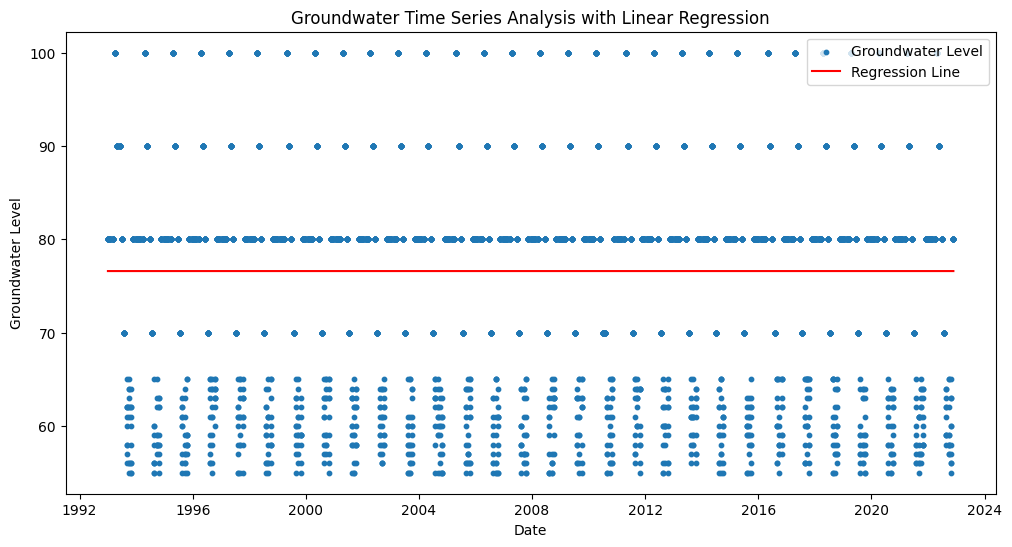

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

csv_file = 'water_level_timeseries.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

y = df['level']  # Replace 'groundwater_level' with the actual column name for groundwater level
X = sm.add_constant(pd.Series(1, index=df.index))  # Add a constant column of ones

model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(12, 6))
plt.scatter(df.index, y, label='Groundwater Level', s=10)
plt.plot(df.index, model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('Groundwater Level')
plt.title('Groundwater Time Series Analysis with Linear Regression')
plt.legend()
plt.show()


# Multiple line reg

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Fake_D.csv')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Corrected date format

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Plot all regression lines on one graph
plt.figure(figsize=(12, 8))

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for each site
for i, model in enumerate(regression_models):
    site_data = df[df['site'] == sites[i]]
    plt.plot(site_data['date'], model.fittedvalues, label=f'{sites[i]} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
plt.legend()
plt.tight_layout()
plt.show()